In [ ]:
'''todo:
- write code that stops simulation if body runs into planet or sun
- write code into simulator that counts how many times the body is flung out, runs into planet, runs into sun, etc.
- figure out how to save simulation after it is done running (both as video and as final image)
- put figures of simulations on subplots 
- figure out what we'd like to display/conclude from our simulation (maybe we test existing ejection constants, 
figure out size of planet needed to clear orbit, etc.)
- update picture to include theta 4
'''

# Clearing an Orbit
## A formal investigation into how Pluto tragically lost its planethood
### Collin Fitzpatrick, Alejandro Wang, Alan Wu

### Background
According to the International Astronomical Union, a celestial body must meet three criteria to be considered a planet.

1. It must orbit a star (in our cosmic neighborhood, the Sun). 
2. It must be big enough to have enough gravity to force it into a spherical shape. 
3. It must be big enough that its gravity cleared away any other objects of a similar size near its orbit around the Sun. 

### Goal
We would like to build a simulation that can model how a large planet object orbiting the sun interacts with smaller bodies in its path. 

Some questions we have include:
- How big must the planet be relative to the bodies in order to clear the orbit?
- Where do the small bodies end up? As moons? Thrown out of solar system? Thrown into the planet or the sun?

### The Setup
**note that all variables with subscript j refer to the planet (as if it was jupiter)*

<img src="phys24ProjectImage.jpeg" alt="drawing" width="500"/>

From independent variables $r$, $r_j$, $\theta_1$, and $\theta_2$ we can derive expressions for the distance $s$ between the orbiting bodies and the angle $\theta_3$ between the planet and the sun with the small body at the vertex.

Using the law of cosines,
$$s^2=r^2+r_j^2-2rr_j\cos(\theta_2-\theta_1)$$
$$\theta_3=\cos^{-1}\left(\frac{r_j^2-s^2-r^2}{-2sr}\right)$$

Additionally, if we use units of astronomical units for length, sun mass units for mass, and years for time, we can derive the following useful expression:
$$GM_{sun}=4\pi^2$$

#### Equations of Motion

##### Planet (Assuming Small Body Has Negligible Mass)

For simplicity, we assume that the mass of the smaller bodies is negligible in comparison to the planet. In this case, the motion of the planet is unaffected by the presence of the body, and the only force on the planet is the gravitational attraction to the sun (which we assume is stationary: $M_{sun}>>M_{j}$).

This yields the following equation of motion for the planet:
\begin{align}
    \Sigma \vec{F} &= \vec{F_s} = -G\frac{M_sM_j}{r_j^2}\hat{r} \\
    \text{assuming a circular orbit: } F_s &= F_{centripetal}  \\
    \text{resulting in: } \omega &= \sqrt{\frac{GM_s}{r^3}} \\
    \theta_1 (t)&=\sqrt{\frac{GM_s}{r^3}}t
\end{align}
As expected, the planet will orbit at a constant angular velocity at a constant radial distance.

##### Planet (Assuming Small Body Has Significant Mass)

If we assume that the small body's mass is not negligible, we must account for its gravitational pull as well as the attraction of the sun.

Separately, these are given by:

$$ \vec{F_s}=-G\frac{M_sM_j}{r_j^2} \hat{r}$$
$$|F_b|=G\frac{M_jm}{s^2}$$ where $F_b$ is the force of the small body.
The sun's force is solely in the radial direction, but the pull of the small body can have components in both the radial and tangential directions. These components, in terms of $\theta_4$, are given by:
$$\vec{F_{b\theta}}=|F_b|\sin(\theta_4)\hat{\theta}$$
$$\vec{F_{br}}=-|F_b|\cos(\theta_4)\hat{r}$$
We can derive an expression for $\theta_4$ based on the other angles:
$$\theta_4=\pi - [\theta_3 + (\theta_2 - \theta_1)]$$
The gravitational force of the small body is the only force in the tangential direction, yielding:
\begin{align}
    \Sigma \vec{F_\theta} = \vec{F_{b\theta}} &= |F_b|\sin(\theta_4)\hat{\theta}\\
    \Sigma \vec{F_\theta} = M_j\vec{a_\theta} &= G\frac{M_jm}{s^2}\sin(\theta_4)\hat{\theta}\\
    \vec{a_\theta} &= r_j\ddot{\theta_j} + 2\dot{\theta_j}\dot{r_j} \\
    \ddot{\theta_j} &= G\frac{m\sin(\theta_4)}{r_js^2}-\frac{2\dot{\theta_j}\dot{r_j}}{r_j}\hat{\theta}
\end{align}

The sun and the small body both contribute to the force in the radial direction, yielding the following equation for radial acceleration:

\begin{align}
    \Sigma \vec{F_r} = \vec{F_s}+\vec{F_{br}} &= -\left(G\frac{M_sM_j}{r_j^2}+|F_b|\cos(\theta_4)\right)\hat{r}\\
    \Sigma \vec{F_r} = M_j\vec{a_r} &= -\left(G\frac{M_sM_j}{r_j^2}+G\frac{M_jm\cos(\theta_4)}{s^2}\right)\hat{r}\\
    \vec{a_{r}} &= \ddot{r_j}-r_j\dot{\theta_j}^2 \\
    \ddot{r_j} &= -\left(G\frac{M_s}{r_j^2}+G\frac{m\cos(\theta_4)}{s^2}\right)+r_j\dot{\theta_j}^2\hat{r}
\end{align}
We have now derived equations for the radial and tangential accelerations of the planet which we can use to fully simulate its motion.

##### Small Body

The small body has a more complicated motion. Its mass $m$ is affected by the gravity of the planet as well as the attraction of the sun. Separately, these are given by:

$$ \vec{F_s}=-G\frac{M_sm}{r^2} \hat{r}$$
$$|F_j|=G\frac{M_jm}{s^2}$$
The sun's force is solely in the radial direction, but the pull of the planet can have components in both the radial and tangential directions. These components, in terms of $\theta_3$, are given by:
$$\vec{F_{j\theta}}=-|F_j|\sin(\theta_3)\hat{\theta}$$
$$\vec{F_{jr}}=-|F_j|\cos(\theta_3)\hat{r}$$
The gravitational force of the planet is the only force in the tangential direction, yielding:
\begin{align}
    \Sigma \vec{F_\theta} = \vec{F_{j\theta}} &= -|F_j|\sin(\theta_3)\hat{\theta}\\
    \Sigma \vec{F_\theta} = m\vec{a_\theta} &= -G\frac{M_jm}{s^2}\sin(\theta_3)\hat{\theta}\\
    \vec{a_\theta} &= r\ddot{\theta}+2\dot{\theta}\dot{r} \\
    \ddot{\theta} &= -G\frac{M_j\cos(\theta_3)}{rs^2}-\frac{2\dot{\theta}\dot{r}}{r}\hat{\theta}
\end{align} 
The sun and the planet both contribute to the force in the radial direction, yielding the following equation for radial acceleration:
\begin{align}
    \Sigma \vec{F_r} = \vec{F_s}+\vec{F_{jr}} &= -\left(G\frac{M_sm}{r^2}+|F_j|\cos(\theta_3)\right)\hat{r}\\
    \Sigma \vec{F_r} = m\vec{a_\theta} &= -\left(G\frac{M_sm}{r^2}+G\frac{M_jm\cos(\theta_3)}{s^2}\right)\hat{r}\\
    \vec{a_r} &= \ddot{r}-r\dot{\theta}^2 \\
    \ddot{r} &= -\left(G\frac{M_s}{r^2}+G\frac{M_j\cos(\theta_3)}{s^2}\right)+r\dot{\theta}^2\hat{r}
\end{align}
We have now derived equations for the radial and tangential accelerations of the small body which we can use to fully simulate its motion.

#### Code

##### Import Libraries
We will be using numpy, matplotlib, and the P24ASolver class, which incorporates scipy integration tools.

In [4]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from p24asolver import P24ASolver
import random

In [13]:
collisionPlanet = False
collisionBodySun = False
collisionPlanetSun = False
ejected = False

class pluto(P24ASolver):
    """
    Simulate a planet orbiting the sun with another body in the same orbit.
    """

    def __init__(self, **kwargs):
        super().__init__(
            (('r', '$r_{body}$'), ('rDot', r'$\dot{r_{body}}$'),
             ('rj', '$r_{planet}$'), ('rjDot', '$\dot{r_{planet}}$'), ('theta', r'$\theta_{body}$'), ('thetaDot', '$\dot{\theta_{body}}$'), ('jTheta', r'$\theta _{planet}$'), ('jThetaDot2', '$\dot{\theta_{planet}}$'))
        )
        # m is the small negligible mass, mj is planet
        # note, in solar masses/AU/years, GMs= 4pi^2
        self.rj = kwargs.get('rj', 5.2) # orbit radius of the planet in AU
        self.mj = kwargs.get('mj', 9.5e-1) # planet mass in solar masses, 9.5e-4
        self.jInitialTheta = kwargs.get('jInitialTheta', 0) # initial planet angle
        self.r = kwargs.get('r', 5.2) # orbit radius of the small body
        self.m = kwargs.get('m', 9.5e-1) # small body mass of moon in solar masses
        self.initialTheta = kwargs.get('initialTheta', np.pi/2) # initial angle of body
        self.rtol = kwargs.get('rtol', 1e-10)
        self.atol = kwargs.get('atol', 1e-10)

    def __str__(self):
        "Produce a string representation of the parameters"
        #fmt = r"$rj = {69911000:.2g}, mj = {1.898e27:.2g}, jInitialTheta = {m = {69911000:.2g}, jInitialTheta = {0:.2g}"
        # i didn't feel like doing this so i left it for now
        return fmt.format(self.R, self.m1, self.m2)

    def derivatives(self, t, Y):
        GMs = 4*np.pi**2 #big G times mass of sun
        r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot = Y  # unpack the values, jThetaDot2 because jThetaDot is pre loaded
        sSquared = r**2 + rj**2 - 2*r*rj*np.cos(theta - jTheta)#distance between the masses squared
        theta3 = np.arccos((rj**2-sSquared-r**2)/(-2*np.sqrt(sSquared)*r)) #angle between sun and planet with planetesimal as axis
        y = (theta - jTheta) % (2*np.pi)
        theta3*= (y<np.pi)*2-1
        theta4 = np.pi - (theta3 +(theta - jTheta))
        rDDot = -1 * (GMs/r**2 + GMs*self.mj*np.cos(theta3)/sSquared) + r*thetaDot**2
        rjDDot = -1 * (GMs/rj**2 + GMs*self.m*np.cos(theta4)/sSquared) + rj*jThetaDot**2
        thetaDDot = -GMs*self.mj*np.sin(theta3)/(r*sSquared) - 2*thetaDot*rDot/r
        jThetaDDot = GMs*self.m*np.sin(theta4)/(rj*sSquared) - 2*jThetaDot*rjDot/rj
        global collisionBodySun, collisionPlanetSun, collisionPlanet, ejected
        if r<0.2: #0.0046524726:
            collisionBodySun= True
            
        elif rj <  0.0046524726:
            collisionPlanetSun = True
        elif sSquared < 0.00047789450254522:
            collisionPlanet = True
        elif r > 30:
            ejected = True
        return [rDot, rDDot, rjDot, rjDDot,
                thetaDot, thetaDDot, jThetaDot, jThetaDDot]

    def prepare_figure(self):
        """
        Function that creates the figure and axes for the animation.
        """

        fig, ax = plt.subplots(figsize=(10, 10))
        # We need to set the axes limits so each frame uses the same limits
        # I'll say that the center position of the first mass is at 2 and the second at 4
        ax.set_xlim((-20, 20))
        ax.set_ylim((-20, 20))

#         self.shapes = []
        
        sun = Circle((0, 0), radius=0.2, color='y')
        ax.add_patch(sun)

        return fig, ax

    def draw_frame(self, t):
        """
        Draw frame for time t
        """

        r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot = self(t)
        
        #remove old points
#         self.shape[1].remove()
#         self.shape[0].remove()
        self.shape = []
        
        jupiter = Circle((rj * np.cos(jTheta), rj * np.sin(jTheta)), radius=0.1, color="r")
        small_body = Circle((r * np.cos(theta), r * np.sin(theta)), radius=0.04, color="b")
#         background = Rectangle((-20, -20), 40, 40, color='w', alpha=0.05)
        sun = Circle((0, 0), radius=0.2, color='y')

        # render
        self._ax.add_patch(jupiter)
        self._ax.add_patch(small_body)
#         self._ax.add_patch(background)
        self._ax.add_patch(sun)
        
        self.shape.append(jupiter)
        self.shape.append(small_body)
#         self.shape.append(background)
#         self.shape.append(sun)
        title = self._ax.set_title(f"t = {t:.2f}", usetex=False)

        # By returning the list of Artists that have changed,
        # we speed up the animation
        
        return self.shape, title

# Maybe turn the next two into videos cuz they look cool

<IPython.core.display.Javascript object>


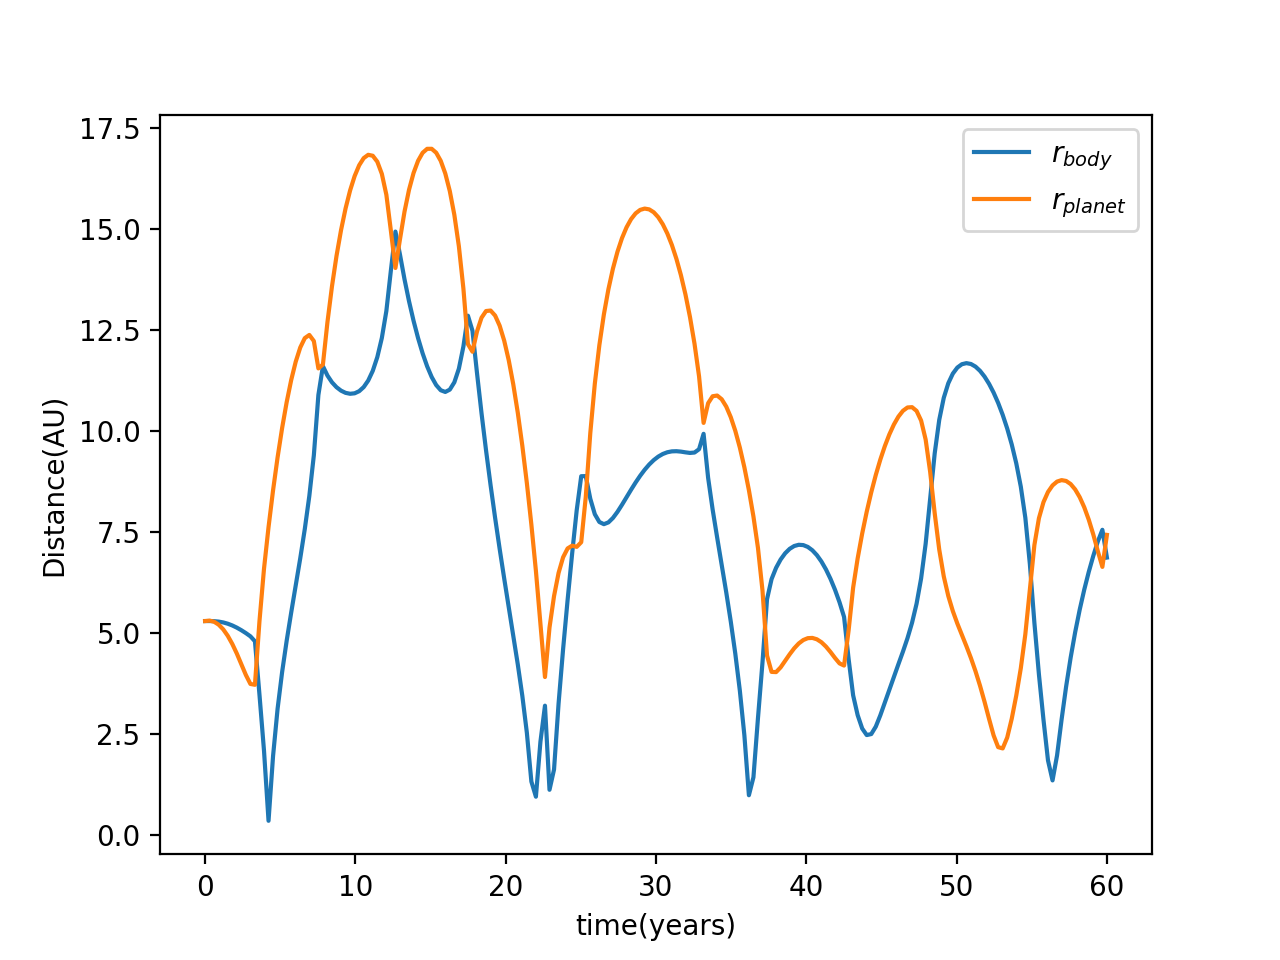

<IPython.core.display.Javascript object>


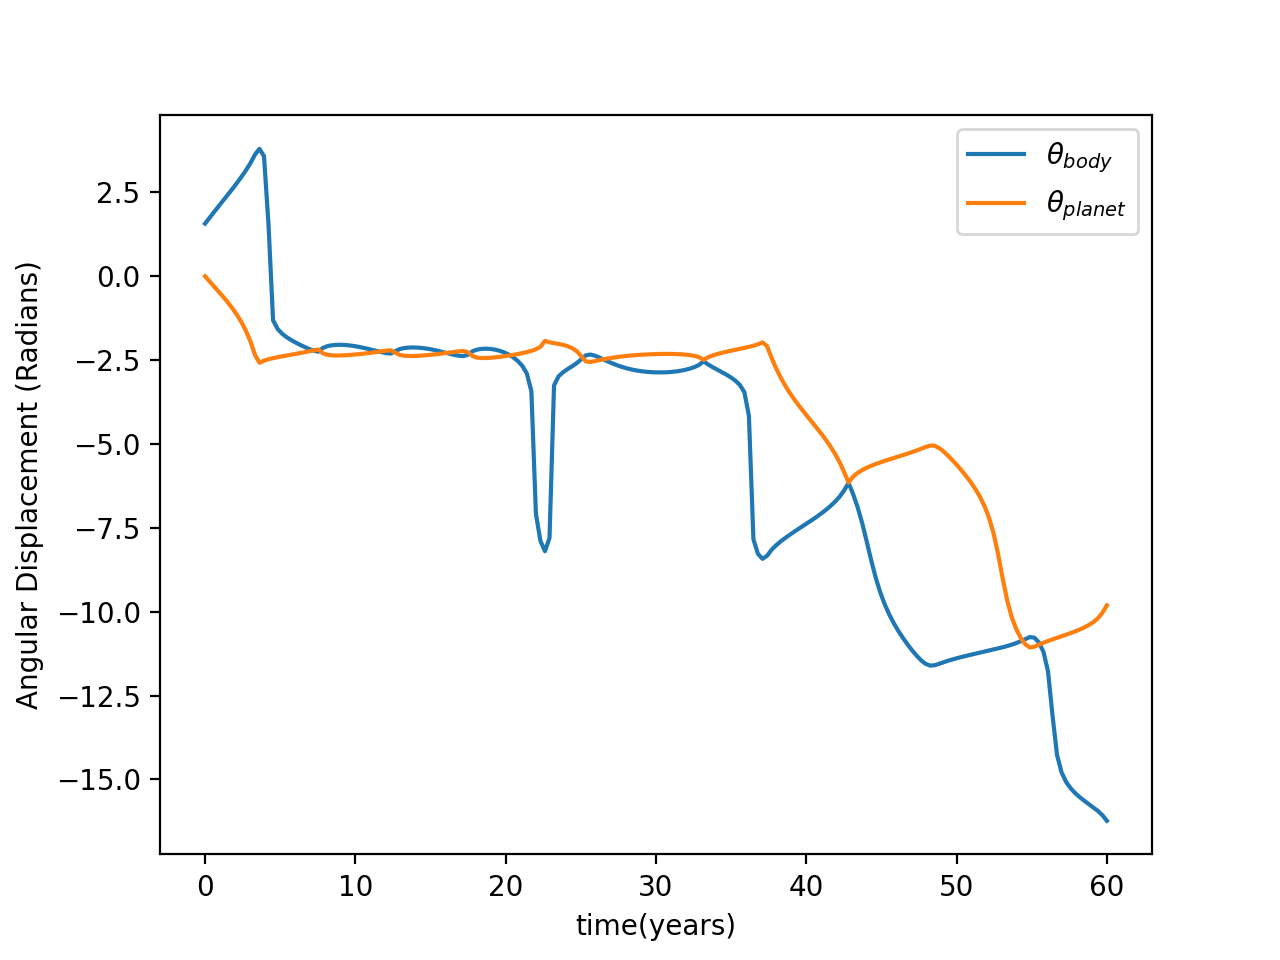

<IPython.core.display.Javascript object>


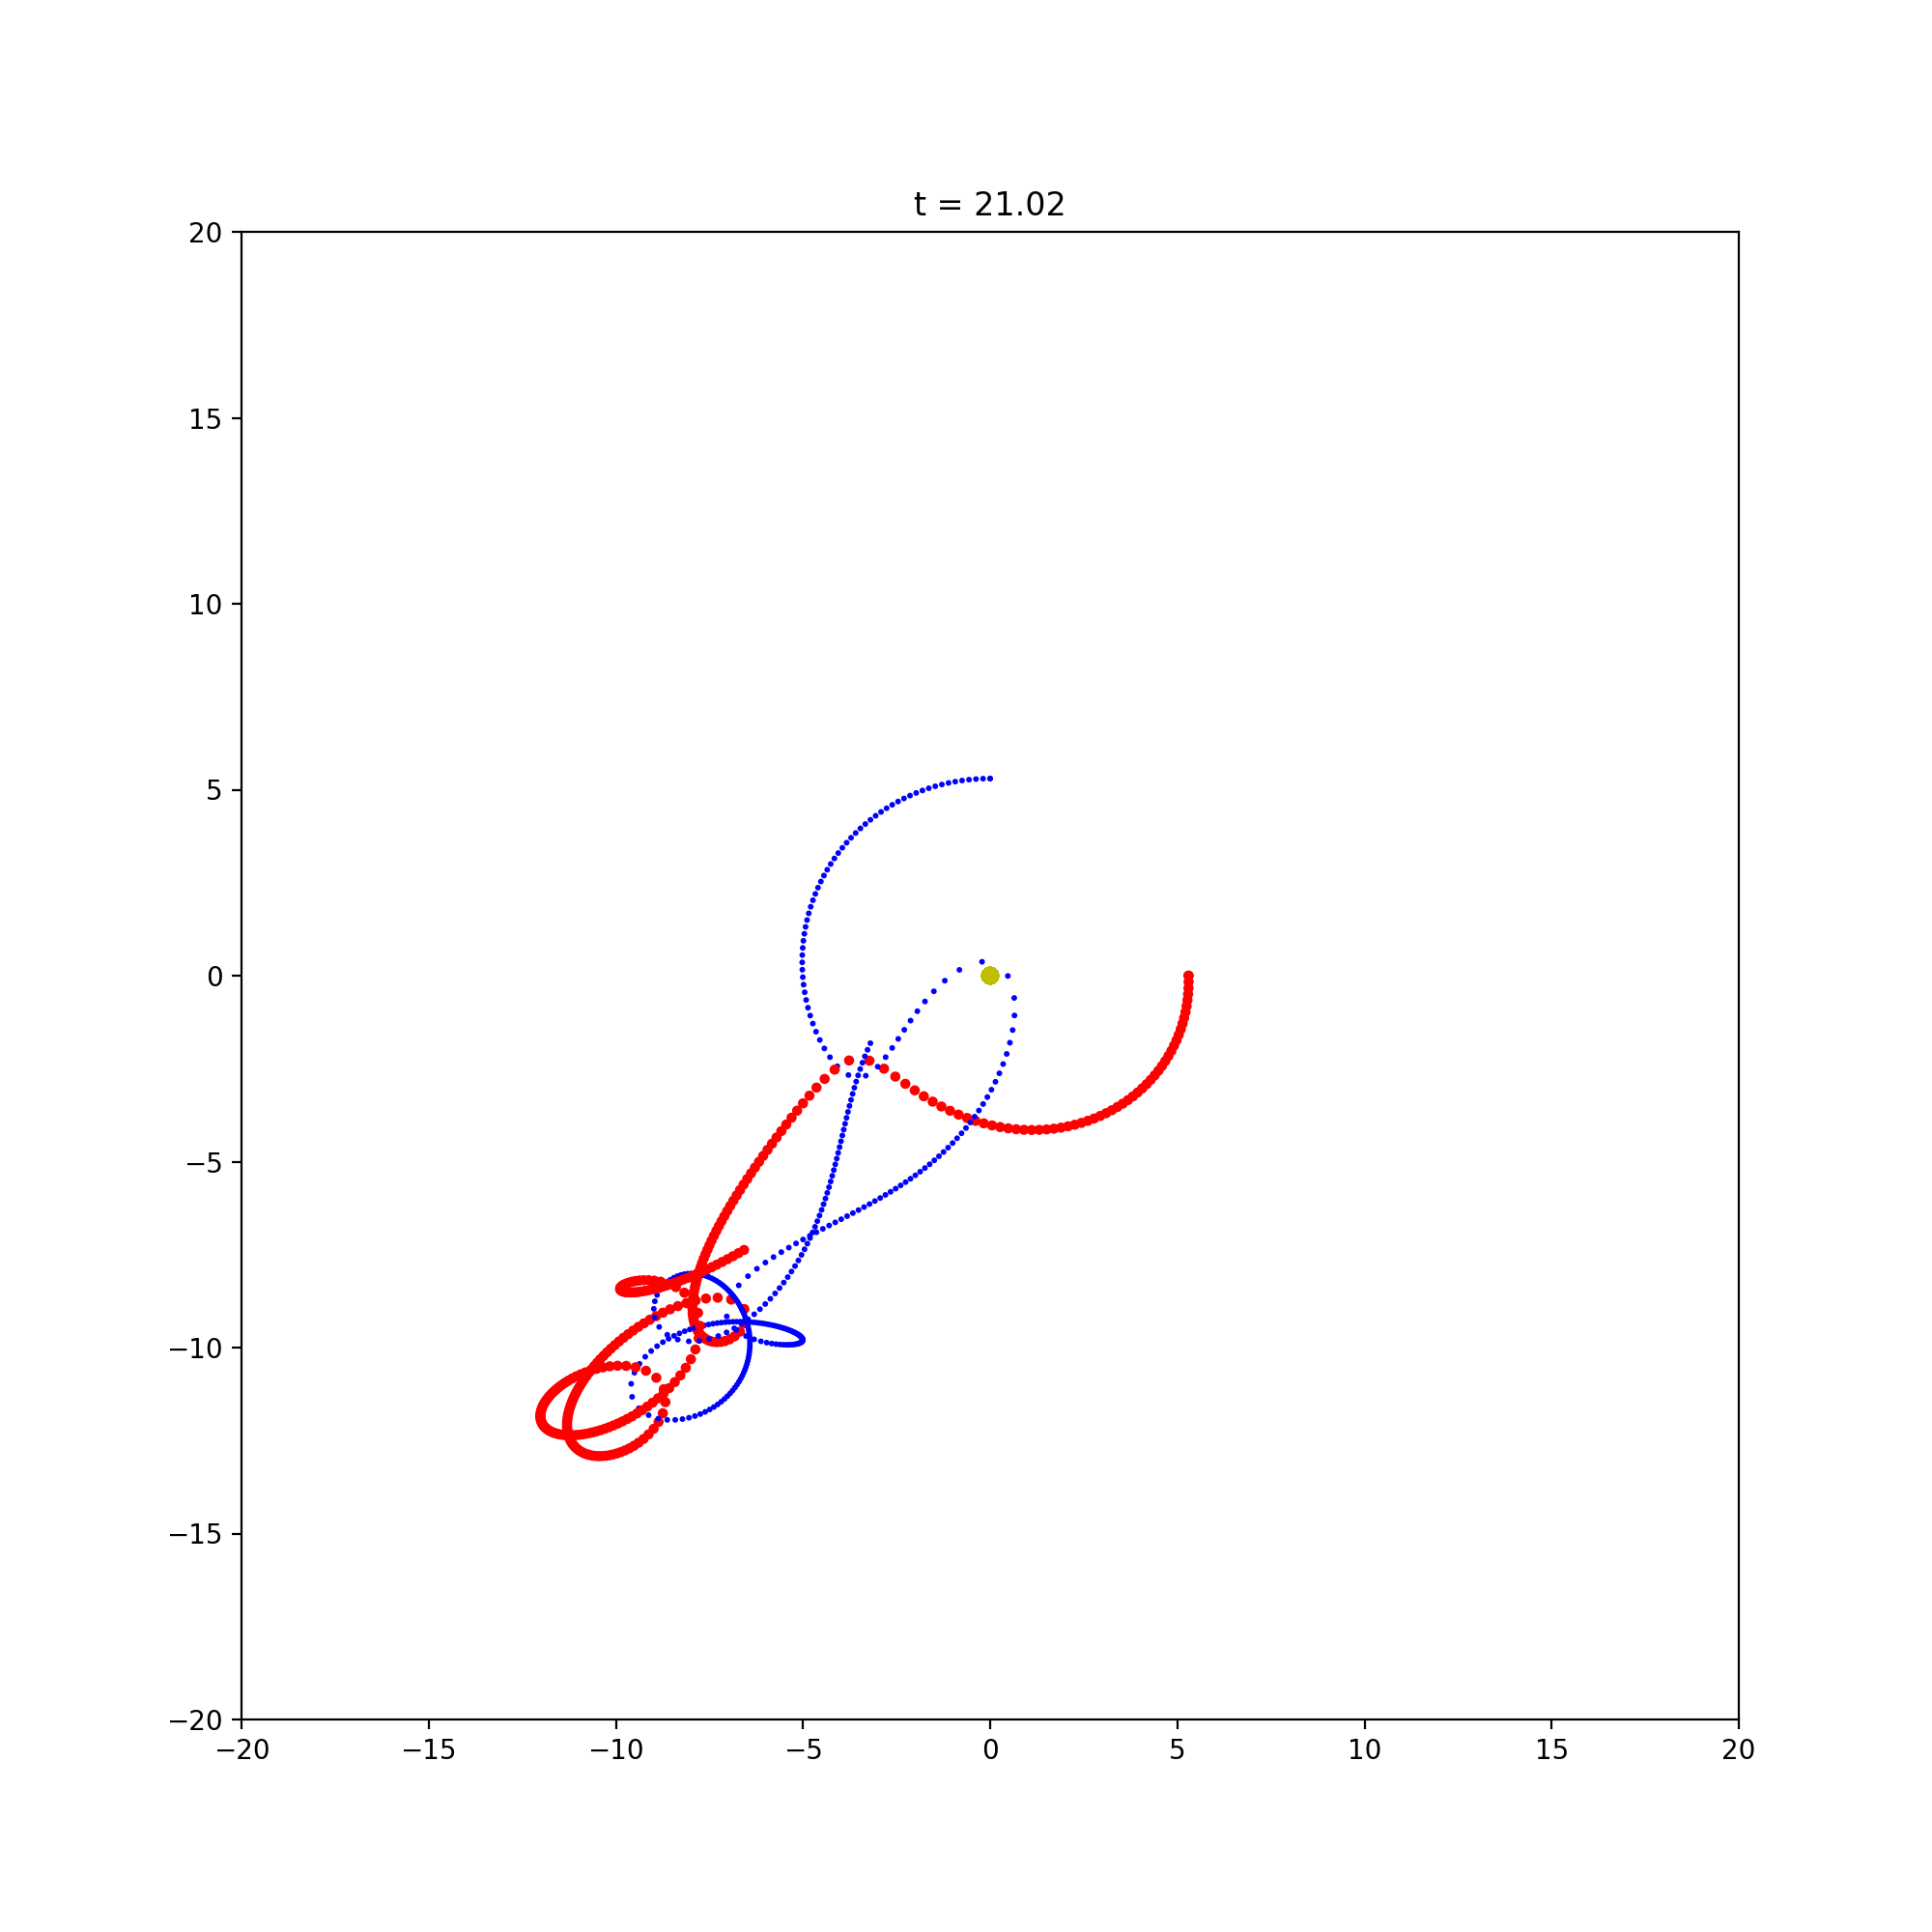

<IPython.core.display.Javascript object>


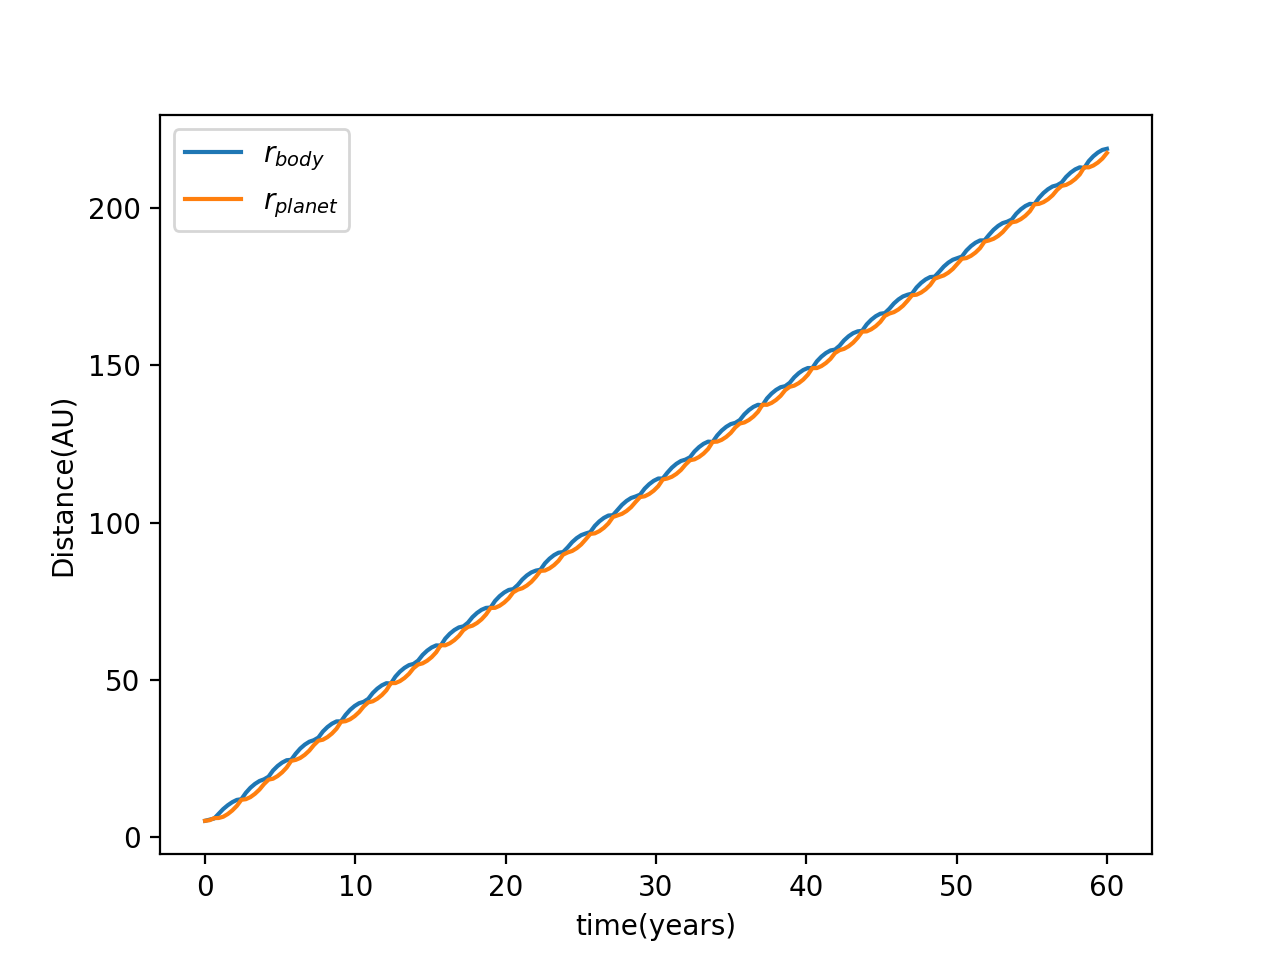

<IPython.core.display.Javascript object>


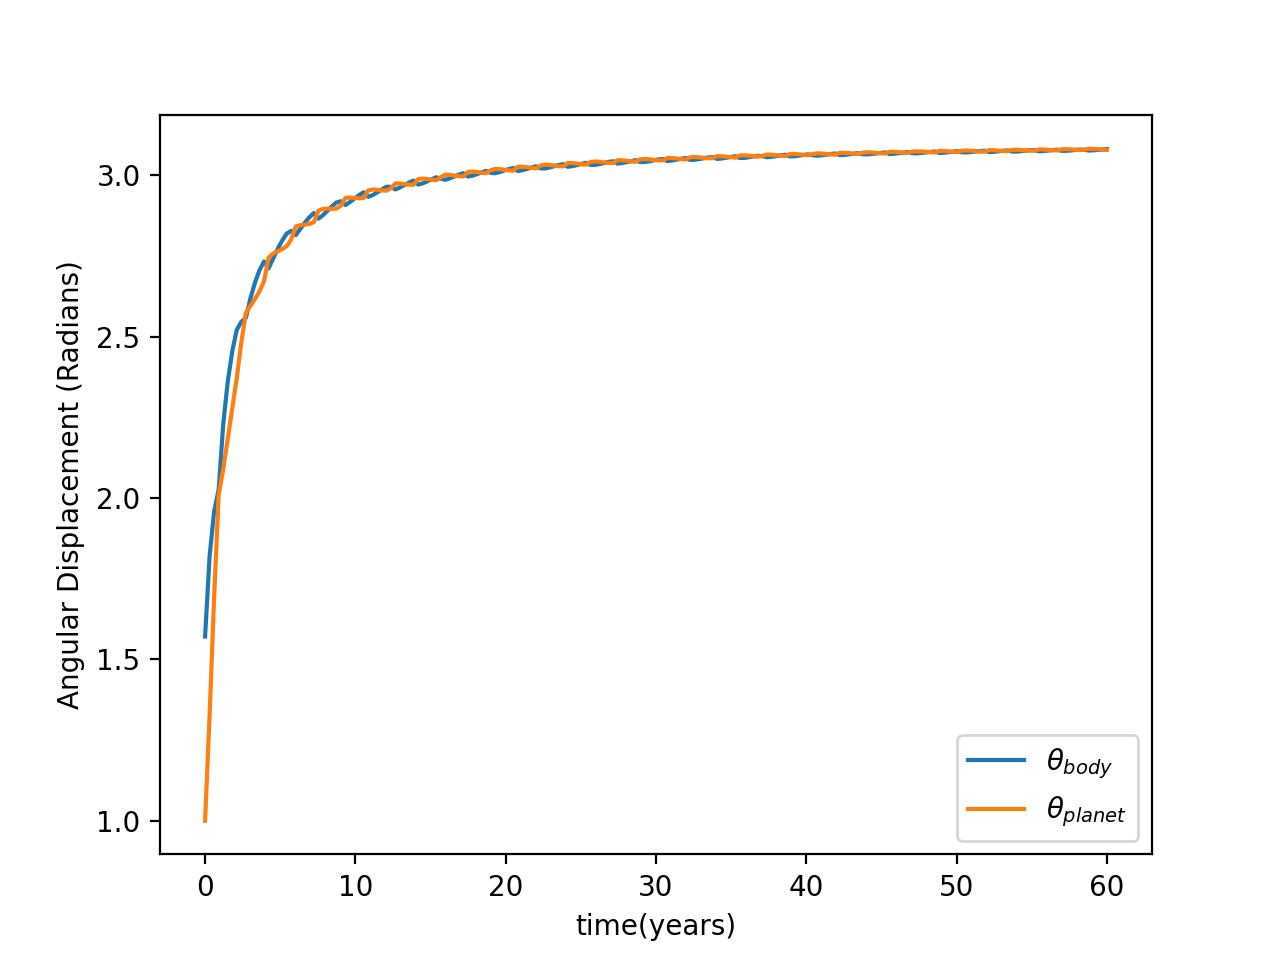

<IPython.core.display.Javascript object>


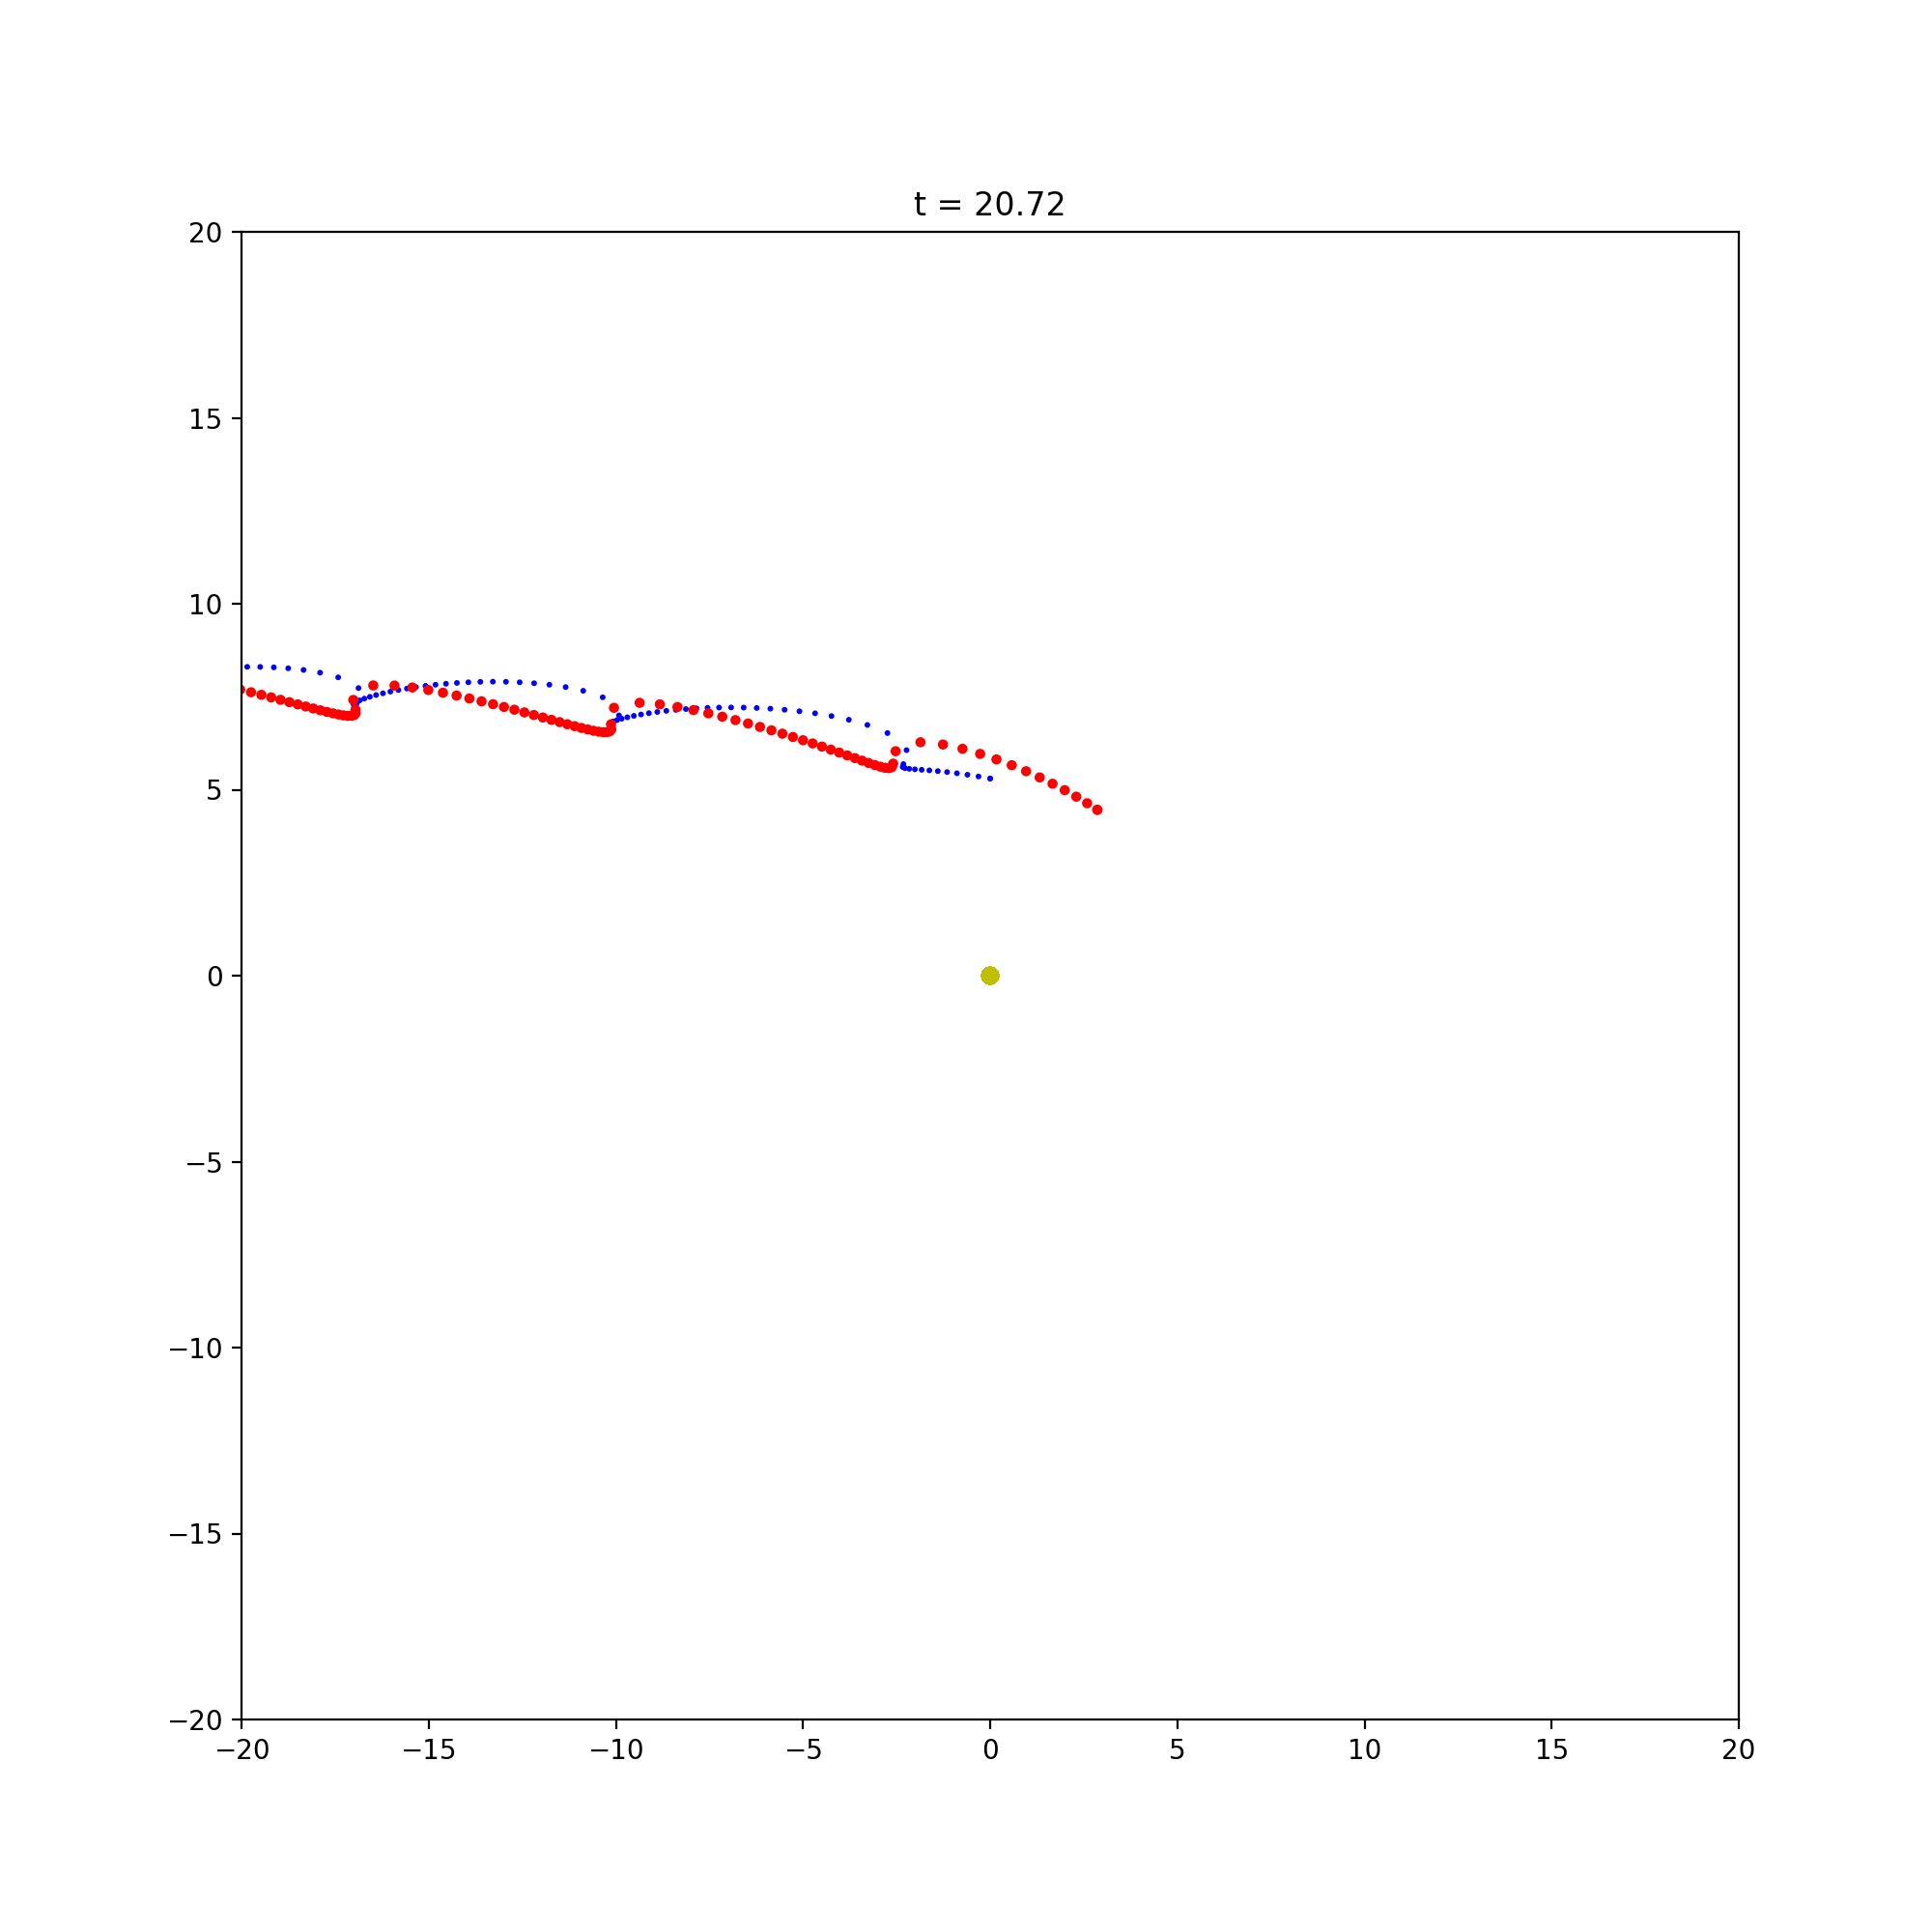

In [22]:
rest = (0,0,0,0)
collisionPlanet = False
collisionBodySun = False
collisionPlanetSun = False
ejected = False
times = np.linspace(0, 60, 200) #y = r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot2 = Y  
jThetaDotInitial = np.sqrt(4*np.pi**2/(5.2)**3) # a constant because assuming negligible mass of planetesimal
r = 5.3
rDot =1
rj = 5.3
rjDot = 0.1
theta = np.pi/2
thetaDot = 1
jTheta = 1
jThetaDot = jThetaDotInitial
sol1 = pluto().solve((5.3, 0, 5.3, 0.1, np.pi/2, 0.6, 0, -1*jThetaDotInitial), (0,60)).plot(times, ['r','rj'], x_axis = "time(years)", y_axis = "Distance(AU)");
sol1 = pluto().solve((5.3, 0, 5.3, 0.1, np.pi/2, 0.6, 0, -1*jThetaDotInitial), (0,60)).plot(times, ['theta','jTheta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)");
sol1.animate(1000)
jThetaDotInitial = np.sqrt(4*np.pi**2/(5.2)**3) # a constant because assuming negligible mass of planetesimal
r = 5.3
rDot =1
rj = 5.3
rjDot = 0.1
theta = np.pi/2
thetaDot = 1
jTheta = 1
jThetaDot = 1
sol1 = pluto().solve((r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot), (0,60)).plot(times, ['r','rj'], x_axis = "time(years)", y_axis = "Distance(AU)");
sol1 = pluto().solve((r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot), (0,60)).plot(times, ['theta','jTheta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)");
sol1.animate(1000)


In [21]:


def randomBigPlutoGenerator(numSimulations):
    '''runs multiple simulations of our negligibleMassPluto class with random starting points, 
    plots and simulates results'''
    global collisionBodySun, collisionPlanetSun, collisionPlanet, ejected

    times = np.linspace(0, 20, 401) 
    collisionPlanetCount = 0
    collisionBodySunCount = 0
    collisionPlanetSunCount = 0
    ejectedCount = 0
    for i in range(numSimulations):
        #y = r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot2 = Y  
        r = random.uniform(5, 10)
        rDot = random.uniform(0, 3)
        theta = random.uniform(0, np.pi*2)
        thetaDot = random.uniform(0, 1)
        rj = random.uniform(5, 10)
        rjDot = random.uniform(0, 3)
        jTheta = random.uniform(0, np.pi*2)
        jThetaDot = random.uniform(0, 1)
        sol2 = pluto().solve((r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot), (0,20))#.plot(times, ['r','theta', 'rj', 'jTheta']);
#         sol2.animate(300)
        collisionPlanetCount += collisionPlanet
        collisionBodySunCount += collisionBodySun
        collisionPlanetSunCount += collisionPlanetSun
        ejectedCount += ejected
        print(f"trialnumber ={i}")
        print(f"r={r}, rDot={rDot}, theta={theta}, thetaDot={thetaDot}, rj={rj}, rjDot={rjDot}, jTheta={jTheta}, jThetaDot={jThetaDot}")
        print(f"collisionPlanetCount={collisionPlanet}, collisionBodySunCount={collisionBodySun}, collisionPlanetSunCount={collisionPlanetSun}, ejectedCount={ejected})")
        collisionPlanet = False
        collisionBodySun = False
        collisionPlanetSun = False
        ejected = False
    print(f"collisionPlanetCount={collisionPlanetCount}, collisionBodySunCount={collisionBodySunCount}, collisionPlanetSunCount={collisionPlanetSunCount}, ejectedCount={ejectedCount})")


randomBigPlutoGenerator(1000)
print("done")

trialnumber =0
r=5.363305129268433, rDot=2.148673636919413, theta=0.8642114723866764, thetaDot=0.41587608853313884, rj=8.20650885753467, rjDot=1.2413088585679997, jTheta=4.15160545154539, jThetaDot=0.6287367382656359
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =1
r=9.262124120646696, rDot=1.2264390047847722, theta=3.7427679216596554, thetaDot=0.5517026947095874, rj=7.666223869649066, rjDot=0.862495389901878, jTheta=3.9853860400038457, jThetaDot=0.6573659854058372
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =2
r=6.452579114472222, rDot=2.3396950182389533, theta=2.920179092062323, thetaDot=0.7711533527299428, rj=9.133385800962243, rjDot=2.870000221534318, jTheta=1.2926370079572518, jThetaDot=0.6019265203063613
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =3
r=8.65009

<ipython-input-13-a65786c5503d>:37: RuntimeWarning: invalid value encountered in arccos
  theta3 = np.arccos((rj**2-sSquared-r**2)/(-2*np.sqrt(sSquared)*r)) #angle between sun and planet with planetesimal as axis


trialnumber =10
r=6.131168967860365, rDot=2.673672869764964, theta=2.5293870650701247, thetaDot=0.324208470094832, rj=5.294603248724065, rjDot=1.7762575764413902, jTheta=1.8217337404398504, jThetaDot=0.4608110572308898
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =11
r=6.0373980792564215, rDot=1.5810336133835037, theta=1.2049784359780547, thetaDot=0.011537812677619885, rj=5.391027693900242, rjDot=2.3071876672673595, jTheta=5.731639551117298, jThetaDot=0.35508573775916874
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =12
r=6.286791016105628, rDot=1.0186861546311148, theta=0.013229856270136857, thetaDot=0.18591343046894737, rj=7.166668893561475, rjDot=1.7860126224648747, jTheta=0.02141242463310209, jThetaDot=0.47498242304815197
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnum

trialnumber =35
r=5.489634321992154, rDot=0.29840564453984897, theta=2.3387746267660865, thetaDot=0.11906509386904374, rj=6.692559293042463, rjDot=1.9180633821287798, jTheta=2.3987586632757703, jThetaDot=0.27730237576480954
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =36
r=6.660095163697935, rDot=1.6138940654515719, theta=6.153572048335148, thetaDot=0.16797330982143566, rj=9.941676091194854, rjDot=1.2347737803373064, jTheta=1.3190189028213533, jThetaDot=0.3102247214274767
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =37
r=6.1752131528886425, rDot=0.4838818740976313, theta=1.5414195482408604, thetaDot=0.08596278247525668, rj=8.279711808274879, rjDot=1.6560269997110715, jTheta=3.2735864754646973, jThetaDot=0.5603556013431622
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumb

trialnumber =62
r=5.477103848165841, rDot=1.6756737493174292, theta=5.352254329227024, thetaDot=0.2885653456472316, rj=6.514612787606262, rjDot=0.0029545233682979344, jTheta=2.4753943585181393, jThetaDot=0.9336037881088999
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =63
r=7.853178533973248, rDot=1.9794942507788917, theta=3.1963306038127097, thetaDot=0.1571040302865645, rj=5.148900880371654, rjDot=0.006823923642908625, jTheta=5.605028281812969, jThetaDot=0.6531424630881146
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =64
r=9.871068340179773, rDot=1.2423357776557398, theta=0.16611123741362474, thetaDot=0.8969297971145522, rj=5.507903826213591, rjDot=0.1628541394487365, jTheta=2.4664563513841125, jThetaDot=0.9949956035821134
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber

trialnumber =90
r=6.894749187463829, rDot=2.0242003631655745, theta=0.9152279900715068, thetaDot=0.09140058371799586, rj=9.00798743820608, rjDot=2.4122591409756833, jTheta=2.8278620928258187, jThetaDot=0.9328673844643768
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =91
r=8.117516641441291, rDot=0.9483893656192025, theta=0.136127202755544, thetaDot=0.7329188107333178, rj=8.908728232430398, rjDot=1.4595683029731643, jTheta=1.1032972679829172, jThetaDot=0.37372800389232363
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =92
r=9.874145359031619, rDot=0.186972649872439, theta=4.70855510631547, thetaDot=0.6154565883745596, rj=9.75832591498742, rjDot=2.191849524023441, jTheta=5.236931320301265, jThetaDot=0.14859226104217116
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =93
r=9.3

trialnumber =116
r=9.672498156855546, rDot=2.0830202161672315, theta=1.4508439169895677, thetaDot=0.9704762198332754, rj=7.523097752379115, rjDot=2.0840737251082615, jTheta=4.3105096226104935, jThetaDot=0.24366914261861172
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =117
r=6.6885819279403425, rDot=2.5064970512861184, theta=0.35205023624412396, thetaDot=0.8898436799872359, rj=8.798152174659737, rjDot=0.9124068353761495, jTheta=3.0186005384796464, jThetaDot=0.13763358690533156
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =118
r=9.905673268745316, rDot=0.7806939104599021, theta=1.4656352513585236, thetaDot=0.8908551841934037, rj=9.000698098839177, rjDot=2.1762841479405814, jTheta=2.7756049320437146, jThetaDot=0.45157621221881294
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnum

trialnumber =141
r=9.168896795349685, rDot=0.9685976448509894, theta=2.910427824768832, thetaDot=0.8166410287322501, rj=6.970544141638035, rjDot=1.3726029243685274, jTheta=2.613996316385221, jThetaDot=0.7775899124946716
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =142
r=6.95042525084866, rDot=2.949913009634573, theta=6.189413996705123, thetaDot=0.35292084607171137, rj=5.383170490638404, rjDot=0.96978863109125, jTheta=1.750095605739841, jThetaDot=0.2723527984508374
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =143
r=5.3893583255320205, rDot=2.1358091434352175, theta=0.5512891255896962, thetaDot=0.846902898486084, rj=9.091620694148313, rjDot=1.3308383888708448, jTheta=2.5211440231337545, jThetaDot=0.5914923579902768
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =144
r=9

trialnumber =168
r=5.834466183434203, rDot=2.7212603712098975, theta=1.513861733824913, thetaDot=0.0972559986841911, rj=5.852433247136871, rjDot=0.032589613873422296, jTheta=4.37827764489294, jThetaDot=0.659801957867511
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =169
r=9.070310967974109, rDot=0.6735530871681962, theta=1.569012040456073, thetaDot=0.27325694029862524, rj=8.665129778243738, rjDot=2.1255701342924502, jTheta=2.0899985410958735, jThetaDot=0.4623085503300718
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =170
r=9.923196807421652, rDot=2.070306861291372, theta=3.523365612644514, thetaDot=0.1362965302822433, rj=5.0160625480145775, rjDot=0.3226449725503109, jTheta=1.1575392220487501, jThetaDot=0.6554042711230077
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =171

trialnumber =195
r=5.403625983299387, rDot=0.17070788517524793, theta=1.3150344640586529, thetaDot=0.7035328959534354, rj=5.113472598639913, rjDot=0.47956731896463456, jTheta=2.534952154614596, jThetaDot=0.5539056737410998
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=True, ejectedCount=True)
trialnumber =196
r=7.325810691023413, rDot=2.0554372151860574, theta=6.218508035847626, thetaDot=0.08945076617859771, rj=6.659680180374046, rjDot=1.661018149412881, jTheta=6.211415823543177, jThetaDot=0.9997808951613971
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =197
r=8.723763178096199, rDot=2.1871405977691554, theta=5.6779372280541525, thetaDot=0.2985167597691828, rj=8.624438394937872, rjDot=0.9059369340430754, jTheta=4.414180045752798, jThetaDot=0.8581792828783038
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =198

trialnumber =221
r=6.9273946621540095, rDot=0.47188372324489924, theta=3.3141094017073884, thetaDot=0.5650879423094103, rj=6.607961130503184, rjDot=2.3140618247407545, jTheta=4.349191658071709, jThetaDot=0.5834398526057003
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =222
r=5.291295704147904, rDot=2.5589652933774754, theta=1.14094170949556, thetaDot=0.2027365575650656, rj=5.519329548139583, rjDot=2.0016523056166644, jTheta=5.372319658950007, jThetaDot=0.7093019593074757
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =223
r=7.607515423508637, rDot=0.3311722908341407, theta=4.794292508293878, thetaDot=0.9937337454797118, rj=5.4787666396022985, rjDot=2.4198587195978902, jTheta=2.3920933826732664, jThetaDot=0.7821620221171349
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =22

trialnumber =246
r=5.528227017920415, rDot=2.7677154704056286, theta=1.8878472650405862, thetaDot=0.529523221920343, rj=5.269307349104358, rjDot=0.09490239808927636, jTheta=0.7804846928915051, jThetaDot=0.40936676046883835
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =247
r=9.282324860241202, rDot=0.5247939470840953, theta=0.4248342276106271, thetaDot=0.5643420625871028, rj=8.784970830384808, rjDot=0.636842447436707, jTheta=1.3773713524494031, jThetaDot=0.494692925748628
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =248
r=8.299708982277632, rDot=1.9753009334640468, theta=1.5700094054346274, thetaDot=0.6167727536660265, rj=5.683746775764923, rjDot=0.9419296781186242, jTheta=2.2398964367646186, jThetaDot=0.7078383461930363
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =

trialnumber =271
r=5.2779277718209165, rDot=0.6382701697534711, theta=2.3177104833247606, thetaDot=0.28263254541143457, rj=8.006820282153875, rjDot=0.9778600555408409, jTheta=2.977425266340336, jThetaDot=0.4527427619168811
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =272
r=5.1404171943123265, rDot=0.8619687402067461, theta=4.740162867793887, thetaDot=0.0578077652565665, rj=5.2958336422229575, rjDot=2.235639517304338, jTheta=2.2708351403389604, jThetaDot=0.35771701053870875
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =273
r=6.62268427878048, rDot=2.6904669986679, theta=6.051535571139192, thetaDot=0.8866993806219099, rj=5.019424673297677, rjDot=2.843095446411528, jTheta=4.965784884345626, jThetaDot=0.41697284842270865
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =274

trialnumber =296
r=6.626608101692331, rDot=2.476883115471107, theta=5.397449168227798, thetaDot=0.7745305963110118, rj=9.15807737494875, rjDot=1.205439484761727, jTheta=0.5976048908695836, jThetaDot=0.2436227742880207
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =297
r=8.424938737812091, rDot=1.1453474846547644, theta=2.6973998034390676, thetaDot=0.44759166315875265, rj=8.027814076540603, rjDot=2.9192131594989768, jTheta=5.475295995883052, jThetaDot=0.6439435321225753
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =298
r=8.875511022642783, rDot=2.56897530267702, theta=5.128814710261436, thetaDot=0.3140499201629784, rj=5.781122438397491, rjDot=1.265246327574591, jTheta=1.1682788101485364, jThetaDot=0.6994550374953679
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =299
r=7.

trialnumber =321
r=6.5063710558455, rDot=2.0995751873833144, theta=5.626651502078987, thetaDot=0.6857932987965019, rj=9.934978114650175, rjDot=2.735831147750833, jTheta=5.8908182901266635, jThetaDot=0.65096448070569
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =322
r=8.200896689409904, rDot=1.4946964973655195, theta=4.600212523784297, thetaDot=0.44724115545475807, rj=8.086806370899675, rjDot=0.5051429418311663, jTheta=0.14895889801400453, jThetaDot=0.36599979277886696
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =323
r=5.643897437316277, rDot=0.05495476567796287, theta=1.4365001127185413, thetaDot=0.270157105023034, rj=8.883045742227715, rjDot=0.8215432471160897, jTheta=1.11253790746845, jThetaDot=0.2638215174208426
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =324
r

trialnumber =347
r=7.474715363640011, rDot=0.34771037180620956, theta=5.590459561040913, thetaDot=0.8850453430497958, rj=6.067373448355005, rjDot=2.4838289076878413, jTheta=2.5364370690182976, jThetaDot=0.16237974974647307
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =348
r=7.7393876686727765, rDot=2.1759380931486447, theta=4.807087735008929, thetaDot=0.5139878173594321, rj=7.362461435337745, rjDot=2.437907780688125, jTheta=4.912894093645221, jThetaDot=0.24475990610035292
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =349
r=7.8237886161142125, rDot=2.4199240145813103, theta=0.2716367833014638, thetaDot=0.5916979066181886, rj=7.064701202314956, rjDot=1.422696113674158, jTheta=3.7563370945778707, jThetaDot=0.6438479691296589
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =3

trialnumber =373
r=8.320842713497742, rDot=0.707137025232448, theta=3.2578565476513375, thetaDot=0.11829209053610035, rj=8.732900965197484, rjDot=2.505972909338581, jTheta=0.4355008485349187, jThetaDot=0.320511211840422
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =374
r=9.508473639082206, rDot=1.8758541374006779, theta=0.924085550163396, thetaDot=0.29553252333671887, rj=5.913408097539828, rjDot=0.8570678214481064, jTheta=4.224069774114797, jThetaDot=0.5078439636745811
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =375
r=9.317879180270952, rDot=0.17233903135766826, theta=4.342929880152109, thetaDot=0.05591227317323333, rj=5.828859728165209, rjDot=0.8379661391948372, jTheta=6.218329168048863, jThetaDot=0.4764301584022935
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =3

trialnumber =399
r=8.720862265233151, rDot=0.41790875049295184, theta=2.9913483145833815, thetaDot=0.8139438274323474, rj=8.626010255559924, rjDot=2.3235368884573813, jTheta=2.8402213709518693, jThetaDot=0.4463073525441751
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =400
r=6.276602001572044, rDot=1.5539349759460535, theta=2.2682477544534, thetaDot=0.5419701590760836, rj=5.110490580303402, rjDot=0.006044970623813817, jTheta=2.3888424987685863, jThetaDot=0.13567363066178828
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =401
r=6.981124422438434, rDot=0.508650280793178, theta=1.8544640436598459, thetaDot=0.8721517184233156, rj=6.550205972571472, rjDot=2.2229212064238206, jTheta=2.710430397623474, jThetaDot=0.9133460323232678
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =

trialnumber =425
r=6.047925224535476, rDot=0.9380322380632226, theta=3.4457630303482985, thetaDot=0.1053772749565487, rj=5.500681112332258, rjDot=2.5336039228078464, jTheta=5.2020809644936685, jThetaDot=0.37127964864929464
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =426
r=7.357179366286911, rDot=0.3104309103229004, theta=5.9487203544524245, thetaDot=0.13726694201838707, rj=5.129977510415689, rjDot=0.9293769622120905, jTheta=4.67453381343736, jThetaDot=0.3059699304617106
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =427
r=5.221834235155142, rDot=2.655427288369682, theta=4.089691289243261, thetaDot=0.8317084620095991, rj=5.539939318050206, rjDot=0.38052403490397146, jTheta=0.34317772305519795, jThetaDot=0.2682221136499595
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =

trialnumber =456
r=6.365446540934286, rDot=2.6993922242768322, theta=1.2906901302533174, thetaDot=0.42060911610725715, rj=8.376999423548172, rjDot=1.0816804343630468, jTheta=0.3090710895659276, jThetaDot=0.881664435839655
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =457
r=6.298504817924277, rDot=2.5546795742069666, theta=5.55441238018376, thetaDot=0.26758952965979244, rj=7.397967889912126, rjDot=1.4150938639785404, jTheta=0.33842886373234543, jThetaDot=0.20516022102197617
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =458
r=9.767847831880317, rDot=1.052664470235193, theta=4.960009910960842, thetaDot=0.9634879410933693, rj=7.431430579781415, rjDot=2.166253499420039, jTheta=1.2807141388593855, jThetaDot=0.7303625224799194
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =4

trialnumber =483
r=7.5282622178745635, rDot=0.38706999214785687, theta=3.412279384679639, thetaDot=0.16419280039032536, rj=9.074724443284758, rjDot=0.06097520751317309, jTheta=2.3411814895692493, jThetaDot=0.2065784057144795
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=True, ejectedCount=True)
trialnumber =484
r=6.892207964300941, rDot=2.653721014713789, theta=5.180041809285509, thetaDot=0.354413596709132, rj=6.15686801279281, rjDot=1.0693275934550295, jTheta=3.1568715716171476, jThetaDot=0.7416891721028097
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =485
r=9.373452305371039, rDot=2.914177342639851, theta=0.4170911477718155, thetaDot=0.1061336108911356, rj=9.881586801204733, rjDot=2.8386500310195992, jTheta=2.3455164531236803, jThetaDot=0.8276000092609068
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =48

trialnumber =509
r=7.086900500540411, rDot=1.4261167496008533, theta=0.4153304287427502, thetaDot=0.21010188965184506, rj=7.095373123960194, rjDot=2.881675740069666, jTheta=4.142004651379946, jThetaDot=0.3493419431710837
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =510
r=7.710514509594973, rDot=1.0828408121413053, theta=2.6875096153128477, thetaDot=0.5832284912542206, rj=5.233106790544111, rjDot=2.026694189424262, jTheta=0.9980675514846196, jThetaDot=0.5360273931296239
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =511
r=9.54958336513496, rDot=2.7179882344252357, theta=3.2956384633041464, thetaDot=0.6640142065416067, rj=5.84843010856177, rjDot=1.7285808122018014, jTheta=3.906646160151619, jThetaDot=0.4105185716351908
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =512


trialnumber =536
r=5.534859952110517, rDot=2.687085554276125, theta=6.176490515480598, thetaDot=0.38952956427294216, rj=5.136560618056918, rjDot=1.9407443585002722, jTheta=0.026899102307635144, jThetaDot=0.5036469057015988
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =537
r=6.7935415644247605, rDot=0.203115622562816, theta=5.763307621430564, thetaDot=0.9553755936293006, rj=5.527282513393184, rjDot=1.358801442130015, jTheta=2.6524781597476537, jThetaDot=0.7623994357141636
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =538
r=8.051063302468883, rDot=0.8879266584677861, theta=5.0367043047422255, thetaDot=0.26448125962982094, rj=8.413407184773899, rjDot=2.4496054476776936, jTheta=2.800538233224021, jThetaDot=0.47520114489489707
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber 

trialnumber =561
r=5.792962639685058, rDot=1.7330300625660136, theta=3.119682347174897, thetaDot=0.606564624472475, rj=6.110509243200007, rjDot=1.029725536582581, jTheta=2.9359994470311572, jThetaDot=0.23861644571572715
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =562
r=9.108278439467306, rDot=2.0092805001732734, theta=0.7916073041171572, thetaDot=0.5686895680808133, rj=6.111485421801531, rjDot=1.9667125529822882, jTheta=4.968036151911221, jThetaDot=0.8944425441806158
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =563
r=9.206441899486485, rDot=2.878297459287047, theta=0.6105767003540654, thetaDot=0.2847612468673063, rj=6.375520980719577, rjDot=1.388025967546152, jTheta=2.1849235367560937, jThetaDot=0.12454336362406326
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=True, ejectedCount=True)
trialnumber =564
r

trialnumber =586
r=6.678169597488483, rDot=1.7816716151731473, theta=4.44427304495886, thetaDot=0.5580673645189453, rj=7.946927791024898, rjDot=2.6545948586308104, jTheta=3.9353450486864725, jThetaDot=0.5157147121866361
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =587
r=8.429745852240034, rDot=2.7237762393001343, theta=1.702462840063921, thetaDot=0.22956237214848485, rj=9.58337792074439, rjDot=0.9632794905170858, jTheta=1.9281398811636805, jThetaDot=0.7108038434389339
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =588
r=9.691938668049609, rDot=0.6498117997373732, theta=4.876211579137238, thetaDot=0.5670846336484252, rj=9.562743986819344, rjDot=2.5636932203018126, jTheta=1.3265343928191327, jThetaDot=0.953266066479232
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =589
r

trialnumber =613
r=5.653935838318313, rDot=0.7549098936889306, theta=2.9809220544810406, thetaDot=0.13894643186586453, rj=6.6695554267381265, rjDot=0.6670076845682156, jTheta=6.268666185102668, jThetaDot=0.013877111472592407
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =614
r=8.643159694245128, rDot=0.7675893406822856, theta=5.772462566310624, thetaDot=0.8257485900175104, rj=8.199340355578345, rjDot=2.4029396957837283, jTheta=1.4562896703035977, jThetaDot=0.9797394796297821
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =615
r=8.786907676110882, rDot=1.8714843418846283, theta=0.30387411049555296, thetaDot=0.4256619276551591, rj=8.610805378062793, rjDot=1.9963839035812394, jTheta=5.956816093277932, jThetaDot=0.3361972074425692
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber

trialnumber =639
r=5.654153535527994, rDot=1.2887172760032248, theta=2.9826409757919214, thetaDot=0.37400148734099825, rj=7.6145376605571435, rjDot=0.868408555413057, jTheta=5.620181305152116, jThetaDot=0.3425404110411594
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =640
r=8.495354351803519, rDot=0.6217558967454208, theta=4.009489480097156, thetaDot=0.5560091771088583, rj=5.179850097153456, rjDot=1.2821734531421394, jTheta=4.170261616111428, jThetaDot=0.638002926445248
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =641
r=9.191969839327234, rDot=1.7110693109686403, theta=5.260478166456343, thetaDot=0.9633668777133719, rj=8.074018455562253, rjDot=0.36284757618672925, jTheta=0.32651715261588465, jThetaDot=0.05282150763184601
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =

trialnumber =665
r=8.153440759428427, rDot=1.8687945204949066, theta=1.0747408626362434, thetaDot=0.09430149207789218, rj=5.189535177621495, rjDot=0.7430669198468477, jTheta=3.694666347370209, jThetaDot=0.04447943960057599
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=True, ejectedCount=False)
trialnumber =666
r=9.267282757595762, rDot=2.1338329640876035, theta=2.9853317757485067, thetaDot=0.20714435643299245, rj=8.662005382922377, rjDot=1.6538718831146308, jTheta=6.278703501739016, jThetaDot=0.43582293511344217
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =667
r=6.352243218297706, rDot=1.0258693616302723, theta=2.3687782923242287, thetaDot=0.2283143881413422, rj=6.673101072430915, rjDot=2.5632838205754878, jTheta=0.4641728461379955, jThetaDot=0.3256476679243431
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber 

trialnumber =690
r=9.386166303415244, rDot=0.5166615172594659, theta=4.611485387475263, thetaDot=0.7501858028877175, rj=9.974815257030714, rjDot=0.7693212712580069, jTheta=0.5294631229530382, jThetaDot=0.9757361313437758
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =691
r=9.479188310412296, rDot=0.2770687701537011, theta=2.1784550188297915, thetaDot=0.014277384972453677, rj=8.829135166423825, rjDot=2.1340294600842924, jTheta=2.5168080028502238, jThetaDot=0.62474108669871
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =692
r=5.56710382997516, rDot=2.1735463736463405, theta=4.310377435349556, thetaDot=0.2003447890980169, rj=5.172691865812412, rjDot=2.389575674028419, jTheta=1.309123450734582, jThetaDot=0.7445045027753806
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =693
r

trialnumber =719
r=9.182801034865456, rDot=0.10285637213123933, theta=3.5274171512232084, thetaDot=0.6942786071432724, rj=7.79206751228689, rjDot=1.8050658536871804, jTheta=5.281076847660048, jThetaDot=0.16984726657611715
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=True, ejectedCount=True)
trialnumber =720
r=6.554184675769249, rDot=0.7598667467250506, theta=1.9988647023826136, thetaDot=0.8352025658945627, rj=6.578207460778808, rjDot=2.259358990534825, jTheta=4.359046179118883, jThetaDot=0.7042163214220246
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =721
r=9.16037086778842, rDot=1.43966391840096, theta=4.256098627269132, thetaDot=0.2625205808004224, rj=5.471639580849851, rjDot=0.9306408407397369, jTheta=0.7617372706418016, jThetaDot=0.5813654638658223
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =722
r=

trialnumber =744
r=5.984958117013399, rDot=0.5293089236277607, theta=0.8947042673664518, thetaDot=0.49546465953406327, rj=5.588808399455196, rjDot=1.0383382772671612, jTheta=0.40192779844642507, jThetaDot=0.14472519380924653
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =745
r=6.654356399330055, rDot=2.3039085650472035, theta=5.940317226584733, thetaDot=0.19827520657193554, rj=8.55030658446011, rjDot=0.6077188324917168, jTheta=4.571803882824559, jThetaDot=0.45341158827093997
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =746
r=8.545754493129335, rDot=1.7043386724181997, theta=5.291862089384063, thetaDot=0.09230989619739371, rj=6.467926959634697, rjDot=0.8051186889285766, jTheta=0.393635107908653, jThetaDot=0.9014222001540345
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber

trialnumber =769
r=5.165694918963549, rDot=1.5268004166510767, theta=2.810577490356543, thetaDot=0.4278147802431407, rj=5.709515559122107, rjDot=1.1975480976541695, jTheta=1.6256936864914862, jThetaDot=0.7278695874664036
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =770
r=7.009706078508357, rDot=0.3732904910419842, theta=2.3181468940983536, thetaDot=0.49886203089446446, rj=5.402859421734278, rjDot=0.3094129306943775, jTheta=0.38778225309283915, jThetaDot=0.7478560401534284
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =771
r=5.267689892495751, rDot=0.8055391408980532, theta=0.7363701419458245, thetaDot=0.5271666863198501, rj=6.249081352642243, rjDot=2.2099686707575503, jTheta=1.9877859764533787, jThetaDot=0.722286764446869
collisionPlanetCount=True, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber 

trialnumber =795
r=5.832433719600654, rDot=1.2773329159285955, theta=0.3224124241162097, thetaDot=0.1538939896422007, rj=6.440821813982923, rjDot=2.4464686259870905, jTheta=3.0728814489810667, jThetaDot=0.2078436640700696
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =796
r=5.655615087487115, rDot=1.3876336772980324, theta=3.503666856788953, thetaDot=0.41934101817880354, rj=7.343425342805661, rjDot=0.7580604673327167, jTheta=2.2055053008669434, jThetaDot=0.8096328583336215
collisionPlanetCount=False, collisionBodySunCount=True, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =797
r=7.429411574897954, rDot=2.663321684523148, theta=1.3691444980039253, thetaDot=0.8336586583657791, rj=7.174747674139863, rjDot=1.5211929811374882, jTheta=4.854708994848634, jThetaDot=0.23644414822850257
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =7

trialnumber =821
r=6.454567694883068, rDot=2.5485282079819775, theta=4.338908202466082, thetaDot=0.8852453707086259, rj=9.940081765169037, rjDot=0.19420011482925936, jTheta=4.378938888003543, jThetaDot=0.18578453159236508
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =822
r=8.147550369030618, rDot=0.34128434930416274, theta=3.8174834126268062, thetaDot=0.2593421478197169, rj=9.910654456086178, rjDot=2.1340872230377483, jTheta=2.3252189788423756, jThetaDot=0.7215750377283013
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =823
r=5.356642995198727, rDot=2.9349274760742805, theta=5.721322565340715, thetaDot=0.7542363395726958, rj=6.385612304046122, rjDot=1.0774063243313758, jTheta=1.6594689446335875, jThetaDot=0.40809033581775844
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber

trialnumber =848
r=9.822042065804379, rDot=2.930922960912356, theta=4.826996811149233, thetaDot=0.16317786804033352, rj=6.005270678239766, rjDot=0.26237493690626534, jTheta=5.286676030283339, jThetaDot=0.0252858476351151
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=True, ejectedCount=False)
trialnumber =849
r=5.476618020691516, rDot=0.04281936335865111, theta=4.497935065489962, thetaDot=0.33384915327553233, rj=8.376931214623859, rjDot=2.1808730187984047, jTheta=0.3698559335987346, jThetaDot=0.043798048354783625
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =850
r=9.731772781698314, rDot=0.3197157048135497, theta=5.880613783827189, thetaDot=0.5363053171640288, rj=6.533742776890909, rjDot=2.2393017973557274, jTheta=5.077643236621868, jThetaDot=0.6090198243590675
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =

trialnumber =877
r=7.841425753522194, rDot=0.9994516863827017, theta=0.8160376997090067, thetaDot=0.5965118285759625, rj=9.630298047952627, rjDot=0.438630688771078, jTheta=1.0659286147051295, jThetaDot=0.16061136322474268
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =878
r=6.595016950133772, rDot=2.705277176878743, theta=4.327468399722511, thetaDot=0.633695042983471, rj=9.776379138682703, rjDot=1.167840981163994, jTheta=5.883523834477087, jThetaDot=0.7017131426073954
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =879
r=6.352610373691532, rDot=1.4536369161804077, theta=6.279211807775668, thetaDot=0.8629418987477103, rj=8.208072148959362, rjDot=1.5776058785031264, jTheta=5.161967161887077, jThetaDot=0.8750963434553525
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =880
r=8

trialnumber =902
r=9.744946340189433, rDot=0.2242390872709632, theta=2.878845748407263, thetaDot=0.36491969259228607, rj=8.250204115805907, rjDot=1.94276685476061, jTheta=0.6003477441451928, jThetaDot=0.8899697506826495
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =903
r=8.726228194073668, rDot=0.7823552198547925, theta=2.26827424112409, thetaDot=0.24358785195342592, rj=6.655158757154656, rjDot=2.687640096348332, jTheta=2.6923128358720114, jThetaDot=0.4311131341330251
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =904
r=5.700141365752423, rDot=1.1046616046990716, theta=4.55123290997264, thetaDot=0.27676537003216406, rj=6.7514768524092545, rjDot=1.0797438784356386, jTheta=3.559757587833173, jThetaDot=0.7129168420312564
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =905


trialnumber =927
r=5.357591532926803, rDot=1.8028356410352395, theta=5.550046433800761, thetaDot=0.2141084053888217, rj=7.1121368943421786, rjDot=2.342431318790331, jTheta=1.6517215114497963, jThetaDot=0.9453785148604558
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =928
r=9.914658455386329, rDot=2.7107248924126255, theta=2.792588824316586, thetaDot=0.7273181884095874, rj=9.352895322077355, rjDot=1.591336277618101, jTheta=4.702800282287457, jThetaDot=0.8120494070417935
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =929
r=8.402681165955174, rDot=2.301759233074789, theta=1.9262062613390987, thetaDot=0.5228784153876228, rj=5.6948710847153485, rjDot=1.1943143164771535, jTheta=2.8269103847175674, jThetaDot=0.4974380463849596
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =930

trialnumber =953
r=5.196015697661178, rDot=1.3383951401778176, theta=3.6009388694331896, thetaDot=0.03429535983192311, rj=9.16447774149688, rjDot=2.1979992451322534, jTheta=3.7173340654896694, jThetaDot=0.44027143917349665
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=False)
trialnumber =954
r=7.9733538827962125, rDot=2.1550789296358346, theta=0.2624736013897495, thetaDot=0.7966946709100797, rj=7.846088596608375, rjDot=1.1436086540546873, jTheta=2.8874242959665506, jThetaDot=0.6594275889867686
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =955
r=6.3325316530355575, rDot=1.8472680947740816, theta=0.016161040291267196, thetaDot=0.8527516493174887, rj=9.265732281585123, rjDot=2.7585571523726062, jTheta=5.05020633013805, jThetaDot=0.8575631255409748
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumb

trialnumber =978
r=9.720812145859357, rDot=0.9093781075248034, theta=2.2651270510374615, thetaDot=0.017364420622892007, rj=9.67629452314597, rjDot=0.25230874787113766, jTheta=5.149760577062693, jThetaDot=0.11096457603901522
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=True, ejectedCount=True)
trialnumber =979
r=8.603061601623093, rDot=2.476541837700371, theta=1.9519063100330232, thetaDot=0.7311826664322786, rj=7.131455937556559, rjDot=2.6256185069924243, jTheta=2.116694370541632, jThetaDot=0.07243529954881578
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber =980
r=5.688187268868104, rDot=1.4826666861826419, theta=3.7370364851665476, thetaDot=0.7147568008349149, rj=7.6204918727147275, rjDot=0.863407503450157, jTheta=1.8711574377560223, jThetaDot=0.47827924026121604
collisionPlanetCount=False, collisionBodySunCount=False, collisionPlanetSunCount=False, ejectedCount=True)
trialnumber 

# For 1000 Trials, in 20 years
## Body and Planet collided: 72
## Body and Sun collided:92
## Planet and Sun collided:23
## Planet was ejected from system: 631

# Our code returned this simulation as "body hits sun"...the animation aligns with that

<IPython.core.display.Javascript object>


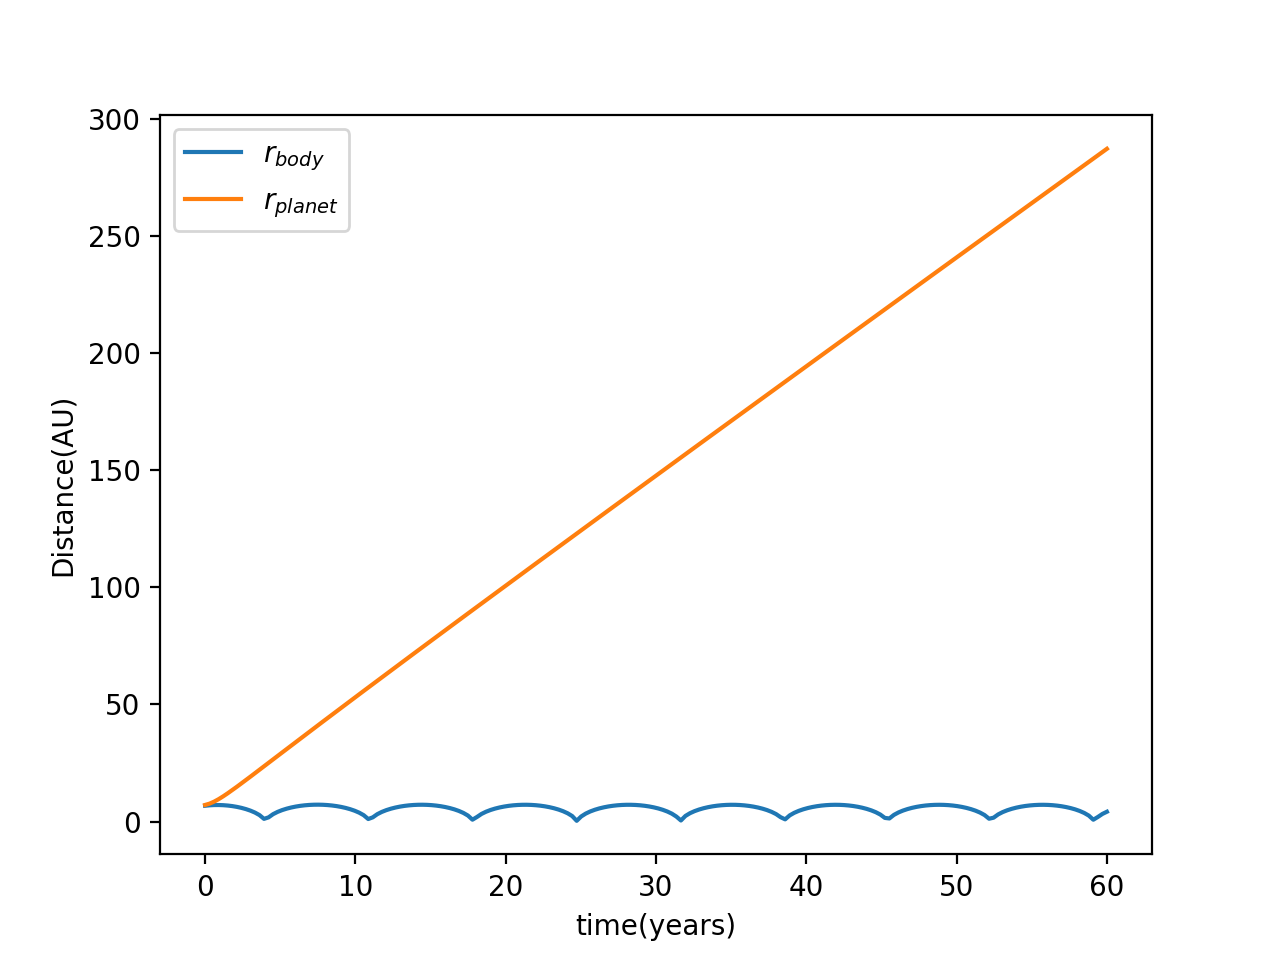

<IPython.core.display.Javascript object>


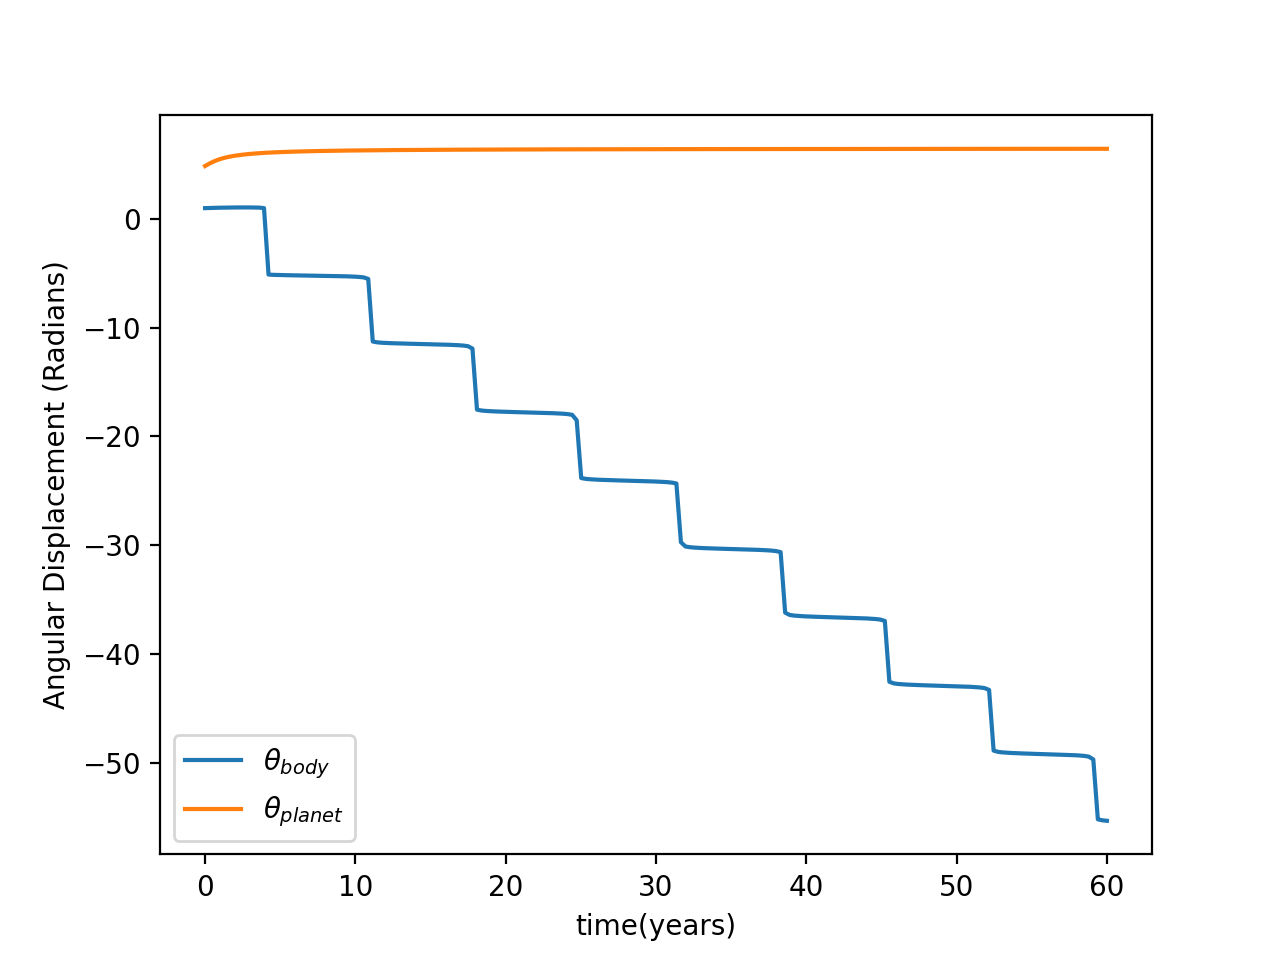

<IPython.core.display.Javascript object>

In [17]:

r=6.7717044682584095
rDot=0.796511341060855
theta=0.9960983981934229
thetaDot=0.051310824289771406
rj=7.119814660343734
rjDot=1.294703985533519
jTheta=4.866821752115331
jThetaDot=0.8441620986541364
sol1 = pluto().solve((r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot), (0,60)).plot(times, ['r','rj'], x_axis = "time(years)", y_axis = "Distance(AU)");
sol1 = pluto().solve((r, rDot, rj, rjDot, theta, thetaDot, jTheta, jThetaDot), (0,60)).plot(times, ['theta','jTheta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)");
sol1.animate(1000)

# Here is some old code when we deemed the small body to have negligible mass

In [ ]:
class negligibleMassPluto(P24ASolver):
    """
    Simulate a planet orbiting the sun with another body in the same orbit.
    Assumes planet is negligibly affected by small mass.
    """

    def __init__(self, **kwargs):
        super().__init__(
            (('r', '$r$'), ('rDot', r'$\dot{r}$'),
             ('theta', r'$theta'), ('thetaDot', '$thetaDot$'))
        )
        # m is the small negligible mass, mj is planet
        # note, in solar masses/AU/years, GMs= 4pi^2
        self.rj = kwargs.get('rj', 5.2) # orbit radius of the planet in AU
        self.mj = kwargs.get('mj', 1) # planet mass in solar masses, 9.5e-4
        self.jInitialTheta = kwargs.get('jInitialTheta', 0) # initial planet angle
        self.r = kwargs.get('r', 5.2) # orbit radius of the small body
        self.m = kwargs.get('m', 2.71e7) # small body mass of moon in solar masses
        self.initialTheta = kwargs.get('initialTheta', np.pi/2) # initial angle of body
        self.rtol = kwargs.get('rtol', 1e-10)
        self.atol = kwargs.get('atol', 1e-10)

    def __str__(self):
        "Produce a string representation of the parameters"
        #fmt = r"$rj = {69911000:.2g}, mj = {1.898e27:.2g}, jInitialTheta = {m = {69911000:.2g}, jInitialTheta = {0:.2g}"
        # i didn't feel like doing this so i left it for now
        return fmt.format(self.R, self.m1, self.m2)

    def derivatives(self, t, Y):
        #need to update if small body runs into jupiter or sun
        GMs = 4*np.pi**2 #big G times mass of sun
        jTheta = np.sqrt(4*np.pi**2/(self.rj)**3)*t
        r, rDot, theta, thetaDot = Y  # unpack the values, jThetaDot2 because jThetaDot is pre loaded
        sSquared = r**2 + self.rj**2 - 2*r*self.rj*np.cos(theta - jTheta)#distance between the masses squared
        theta3 = np.arccos((self.rj**2-sSquared-r**2)/(-2*np.sqrt(sSquared)*r)) #angle between sun and planet with planetesimal as axis
        rDDot = -1 * (GMs/r**2 + GMs*self.mj*np.cos(theta3)/sSquared) + r*thetaDot**2
        thetaDDot = -GMs*self.mj*np.sin(theta3)/(r*sSquared) - 2*thetaDot*rDot/r
        return [rDot, rDDot, thetaDot, thetaDDot]

    def prepare_figure(self):
        """
        Function that creates the figure and axes for the animation.
        """

        fig, ax = plt.subplots(figsize=(10, 10))
        # We need to set the axes limits so each frame uses the same limits
        # I'll say that the center position of the first mass is at 2 and the second at 4
        ax.set_xlim((-20, 20))
        ax.set_ylim((-20, 20))

        self.shapes = []

        sun = Circle((0, 0), radius=0.2, color='y')
        ax.add_patch(sun)

        return fig, ax

    def draw_frame(self, t):
        """
        Draw frame for time t
        """

        r, rDot, theta, thetaDot = self(t)
        rj = self.rj
        jTheta = np.sqrt(4*np.pi**2/(self.rj)**3)*t
        while self.shapes:
            self.shapes[0].remove()

        jupiter = Circle((rj * np.cos(jTheta), rj * np.sin(jTheta)), radius=0.05, color="r")
        small_body = Circle((r * np.cos(theta), r * np.sin(theta)), radius=0.02, color="b")
        self.shape = [jupiter, small_body]
        
        # render
        self._ax.add_patch(jupiter)
        self._ax.add_patch(small_body)
        sSquared = r**2 + self.rj**2 - 2*r*self.rj*np.cos(theta - jTheta)
        title = self._ax.set_title(f"t = {t:.2f}, theta3 = {np.arccos((self.rj**2-sSquared-r**2)/(-2*np.sqrt(sSquared)*r))}", usetex=False)

        # By returning the list of Artists that have changed,
        # we speed up the animation
        return jupiter, small_body, title

In [ ]:
times = np.linspace(0, 20, 401) 
# Y0 = r, rDot, theta, thetaDo
#t ... no starting parameters for jupiter
sol2 = negligibleMassPluto().solve((5.3, 0, np.pi/2, 0), (0,20)).plot(times, ['r'], x_axis = "time(years)", y_axis = "Distance(AU)");
sol2 = negligibleMassPluto().solve((5.3, 0, np.pi/2, 0), (0,20)).plot(times, ['theta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)");


In [ ]:
sol2.animate(300)

In [ ]:
def randomPlutoGenerator(numSimulations):
    '''runs multiple simulations of our negligibleMassPluto class with random starting points, 
    plots and simulates results'''
    times = np.linspace(0, 20, 401) 
    for i in range(numSimulations):
        # Y0 = r, rDot, theta, thetaDot ... no starting parameters for jupiter
        r = random.uniform(0.5, 10)
        rDot = random.uniform(0, 3)
        theta = random.uniform(0, np.pi*2)
        thetaDot = random.uniform(0, 1)
        print(f"r={r}, rDot={rDot}, theta={theta}, thetaDot={thetaDot}")
        sol2 = negligibleMassPluto().solve((r, rDot, theta, thetaDot), (0,20)).plot(times, ['r'], x_axis = "time(years)", y_axis = "Distance(AU)");
        sol2 = negligibleMassPluto().solve((r, rDot, theta, thetaDot), (0,20)).plot(times, ['theta'], x_axis = "time(years)", y_axis = "Angular Displacement (Radians)");
        sol2.animate(300)

randomPlutoGenerator(4)